In [ ]:
import pandas as pd

In [ ]:
a = pd.read_csv("/content/careerbliss_reviews_with_location (2).csv")

In [ ]:
b = pd.read_csv("/content/apple_reviews_mapped (1).csv")

In [ ]:
a = a[a["Company"] == "Apple"]

In [ ]:
a

,Company,Job Title,Overall Rating,Location,Person You Work For,People You Work With,Work Setting,Support You Get,Rewards You Receive,Growth Opportunities,Company Culture,Way You Work
800,Apple,Family Room Specialist,4.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,Apple,Technical Specialist,4.0,"Dallas, TX",5 / 5,5 / 5,5 / 5,5 / 5,3 / 5,5 / 5,5 / 5,5 / 5
802,Apple,Apple Employee,4.0,"Sunnyvale, CA",5 / 5,4 / 5,4 / 5,5 / 5,3 / 5,5 / 5,3 / 5,5 / 5
803,Apple,Specialist,5.0,"Mission Viejo, CA",5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5
804,Apple,Product Service Engineering Technician,4.5,"Cupertino, CA",5 / 5,4 / 5,5 / 5,5 / 5,4 / 5,4 / 5,5 / 5,5 / 5
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Apple,Technical Support Analyst,3.0,"San Antonio, TX",3 / 5,3 / 5,5 / 5,3 / 5,1 / 5,3 / 5,3 / 5,3 / 5
1196,Apple,Specialist,2.0,"San Francisco, CA",2 / 5,5 / 5,4 / 5,3 / 5,3 / 5,2 / 5,2 / 5,1 / 5
1197,Apple,Inventory Control Specialist,3.0,"Frisco, TX",1 / 5,5 / 5,3 / 5,5 / 5,4 / 5,2 / 5,2 / 5,2 / 5
1198,Apple,Specialist,3.0,"Boulder, CO",2 / 5,5 / 5,4 / 5,3 / 5,4 / 5,2 / 5,4 / 5,2 / 5


In [ ]:
b[b["role_grouped"] == "Product / Design"]

,date,role,employment_type,role_grouped,rating,location
0,2025-03-26,Apple Specialist,현직자,Product / Design,5.0,Sulzbach
1,2025-03-26,Apple Specialist,현직자,Product / Design,5.0,Sulzbach
2,2025-03-26,Operations Specialist,전직자,Product / Design,3.0,NaN
3,2025-03-25,Sales Specialist,전직자,Product / Design,5.0,"Staten Island, NY"
4,2025-03-25,Specialist,전직자,Product / Design,4.0,"Bloomington, MN"
...,...,...,...,...,...,...
387,2024-08-10,Product Zone Specialist,전직자,Product / Design,5.0,"King of Prussia, PA"
388,2024-08-09,Specialist,전직자,Product / Design,4.0,"Nashua, NH"
391,2024-08-09,Specialist,전직자,Product / Design,5.0,Polopark MB
397,2024-08-05,Specialist,전직자,Product / Design,1.0,"Orio al Serio, Lombardia"


### a의 직무 이름 변경

In [ ]:
# 1. 분류 기준 정의
job_groups = {
    "Engineering": ["engineer", "engineering", "hardware", "software", "developer", "programmer", "architect", "qa", "sre", "test", "build", "systems", "devops", "solutions", "hadoop", "machine learning", "technician"],
    "Product / Design": ["product", "designer", "ui", "ux", "creative", "graphics", "linguistic", "visual", "image", "media", "design"],
    "Customer Support": ["advisor", "applecare", "genius", "support", "associate", "agent", "service", "chat", "help desk", "customer"],
    "Retail / Sales": ["retail", "store", "cashier", "sales", "representative", "red zone"],
    "Management / PM": ["manager", "lead", "team manager", "project manager", "program manager", "coordinator", "supervisor", "director", "relationship"],
    "Marketing": ["marketing", "brand", "social", "content", "campaign", "Creative Specialist", "specialist"],
    "Finance / Analyst": ["finance", "accounting", "analyst", "payroll", "controller", "business intelligence", "quality assurance", "data analyst", "sql"],
    "HR / People": ["recruiter", "hr", "human resources", "people", "talent", "campus representative"],
    "Internship": ["intern", "trainee", "apprentice"],
    "IT / Infrastructure": ["it", "infrastructure", "technical support", "admin", "network", "systems administrator"],
    "Employee": ["apple employee"],
    "Expert": ["expert", "technical expert"],
    "Others": []
}

# 2. 매핑 함수 정의
def categorize_job_title(title):
    if not isinstance(title, str):
        return "Others"

    title_lower = title.lower()

    for category, keywords in job_groups.items():
        if any(keyword in title_lower for keyword in keywords):
            return category

    return "Others"

# 3. 매핑 적용
a["Job Title2"] = a["Job Title"].apply(categorize_job_title)

# 4. 'Others'에 대해 예외 처리
a.loc[a["Job Title2"] == "Others", "Job Title2"] = a.loc[a["Job Title2"] == "Others", "Job Title"].apply(
    lambda x: "Employee" if "apple employee" in str(x).lower() else ("Expert" if "technical expert" in str(x).lower() else "Others")
)

<ipython-input-38-cf299d693507>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Job Title2"] = a["Job Title"].apply(categorize_job_title)


In [ ]:
a = a[a["Job Title2"] == "Product / Design"]

In [ ]:
a

,Company,Job Title,Overall Rating,Location,Person You Work For,People You Work With,Work Setting,Support You Get,Rewards You Receive,Growth Opportunities,Company Culture,Way You Work,Job Title2
806,Apple,Technical Product Manager,5.0,"Sunnyvale, CA",5 / 5,5 / 5,5 / 5,5 / 5,4 / 5,5 / 5,5 / 5,5 / 5,Product / Design
842,Apple,Product Specialist,4.0,"Santa Clara, CA",3 / 5,5 / 5,5 / 5,5 / 5,5 / 5,3 / 5,3 / 5,5 / 5,Product / Design
845,Apple,Product Design Intern,5.0,"Cupertino, CA",5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,Product / Design
853,Apple,Production Support Specialist,5.0,"Sunnyvale, CA",5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,5 / 5,Product / Design
891,Apple,Lead Recruiter,4.5,"Napoleonville, LA",4 / 5,5 / 5,5 / 5,5 / 5,4 / 5,4 / 5,5 / 5,5 / 5,Product / Design
911,Apple,Product Specialist,4.5,"Columbia, MD",5 / 5,5 / 5,4 / 5,5 / 5,4 / 5,4 / 5,4 / 5,5 / 5,Product / Design
926,Apple,Product Specialist,4.0,"Cincinnati, OH",5 / 5,5 / 5,5 / 5,5 / 5,4 / 5,3 / 5,3 / 5,4 / 5,Product / Design
947,Apple,Product Specialist,4.5,"Palo Alto, CA",5 / 5,5 / 5,5 / 5,5 / 5,4 / 5,4 / 5,4 / 5,5 / 5,Product / Design
970,Apple,Product Specialist,4.5,"Tacoma, WA",5 / 5,5 / 5,5 / 5,5 / 5,3 / 5,5 / 5,4 / 5,5 / 5,Product / Design
977,Apple,Creative Media Manager,4.0,"Cupertino, CA",5 / 5,4 / 5,4 / 5,5 / 5,4 / 5,3 / 5,4 / 5,4 / 5,Product / Design


## DB정리

In [ ]:
a_subset = a[["Job Title2", "Overall Rating","Location"]]

In [ ]:
b_subset = b[["role_grouped","rating","location"]]

## a랑 b 합치기

### 참고자료

In [ ]:
a_subset["Location"].unique()

array(['Sunnyvale, CA', 'Santa Clara, CA', 'Cupertino, CA',
       'Napoleonville, LA', 'Columbia, MD', 'Cincinnati, OH',
       'Palo Alto, CA', 'Tacoma, WA', 'Fremont, CA', 'Irvine, CA'],
      dtype=object)

In [ ]:
b_subset["location"].unique()

array(['Sulzbach', nan, 'Staten Island, NY', 'Bloomington, MN',
       'San Marcos, TX', 'Boston, MA', 'Canada', 'Sacramento, CA',
       'Remote', 'Edison, NJ', 'Southlake, TX', 'New Albany, IN',
       'Glasgow City Centre, Glasgow', 'Sunnyvale, CA', 'Syracuse, NY',
       'Los Angeles, CA', 'California', 'Waterloo, ON',
       'Arizona City, AZ', 'Dublin', 'Calgary, AB', 'Bellevue, WA',
       'Ocala, FL', 'Grand Rapids, MI', 'Seattle, WA', 'Carlsbad, CA',
       'Short Hills, NJ', 'Southampton', 'Cupertino, CA', 'New York, NY',
       'Saint-Laurent-du-Var (06)', 'Birmingham, West Midlands',
       'Paramus, NJ', 'Farmington Hills, MI 48331', 'Culiacán, Sin.',
       'New South Wales', 'Houston, TX', 'Ciudad de México', 'Tokyo',
       'Midvale, UT', 'London, KY', 'London, ON', 'Dallas, TX',
       'SUNNYVALE', 'Columbus, OH', 'Cambridge, MA', 'Glendale, AZ',
       'Saskatoon, SK', 'Connecticut', 'London, Greater London',
       'Austin, TX', 'Carson City, NV', 'Australia', 'Houst

### 매핑

In [ ]:
a_subset['Location_clean'] = a_subset['Location'].str.strip().str.lower()
b_subset['Location_clean'] = b_subset['location'].str.strip().str.lower()

<ipython-input-95-1daa7831920b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_subset['Location_clean'] = a_subset['Location'].str.strip().str.lower()
<ipython-input-95-1daa7831920b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_subset['Location_clean'] = b_subset['location'].str.strip().str.lower()


In [ ]:
a_subset['Location_clean'].unique()

array(['sunnyvale, ca', 'santa clara, ca', 'cupertino, ca',
       'napoleonville, la', 'columbia, md', 'cincinnati, oh',
       'palo alto, ca', 'tacoma, wa', 'fremont, ca', 'irvine, ca'],
      dtype=object)

In [ ]:
location_mapping = {
    'Sunnyvale, CA': '(city)sunnyvale',
    'Santa Clara, CA': '(city)santa clara',
    'Cupertino, CA': '(city)cupertino',
    'Napoleonville, LA': '(city)napoleonville',
    'Columbia, MD': '(city)columbia',
    'Cincinnati, OH': '(city)cincinnati',
    'Palo Alto, CA': '(city)palo alto',
    'Tacoma, WA': '(city)tacoma',
    'Fremont, CA': '(city)fremont',
    'Irvine, CA': '(city)irvine',
    'Sulzbach': '(city)sulzbach',
    'Staten Island, NY': '(city)staten island',
    'Bloomington, MN': '(city)bloomington',
    'San Marcos, TX': '(city)san marcos',
    'Boston, MA': '(city)boston',
    'Canada': '(country)canada',
    'Sacramento, CA': '(city)sacramento',
    'Remote': '(no)',
    'Edison, NJ': '(city)edison',
    'Southlake, TX': '(city)southlake',
    'New Albany, IN': '(city)new albany',
    'Glasgow City Centre, Glasgow': '(city)glasgow',
    'Syracuse, NY': '(city)syracuse',
    'Los Angeles, CA': '(city)los angeles',
    'California': '(country)united states',
    'Waterloo, ON': '(city)waterloo',
    'Arizona City, AZ': '(city)arizona city',
    'Dublin': '(city)dublin',
    'Calgary, AB': '(city)calgary',
    'Bellevue, WA': '(city)bellevue',
    'Ocala, FL': '(city)ocala',
    'Grand Rapids, MI': '(city)grand rapids',
    'Seattle, WA': '(city)seattle',
    'Carlsbad, CA': '(city)carlsbad',
    'Short Hills, NJ': '(city)short hills',
    'Southampton': '(city)southampton',
    'New York, NY': '(city)new york',
    'Saint-Laurent-du-Var (06)': '(city)saint-laurent-du-var',
    'Birmingham, West Midlands': '(city)birmingham',
    'Paramus, NJ': '(city)paramus',
    'Farmington Hills, MI 48331': '(city)farmington hills',
    'Culiacán, Sin.': '(city)culiacán',
    'New South Wales': '(country)australia',
    'Houston, TX': '(city)houston',
    'Ciudad de México': '(city)mexico city',
    'Tokyo': '(city)tokyo',
    'Midvale, UT': '(city)midvale',
    'London, KY': '(city)london',
    'London, ON': '(city)london',
    'Dallas, TX': '(city)dallas',
    'SUNNYVALE': '(city)sunnyvale',
    'Columbus, OH': '(city)columbus',
    'Cambridge, MA': '(city)cambridge',
    'Glendale, AZ': '(city)glendale',
    'Saskatoon, SK': '(city)saskatoon',
    'Connecticut': '(country)united states',
    'London, Greater London': '(city)london',
    'Austin, TX': '(city)austin',
    'Carson City, NV': '(city)carson city',
    'Australia': '(country)australia',
    'Houston': '(city)houston',
    'Littleton, CO': '(city)littleton',
    'Troy, MI': '(city)troy',
    'Iowa City, IA': '(city)iowa city',
    'Cerritos, CA': '(city)cerritos',
    'Elk Grove, CA': '(city)elk grove',
    'Malay Canyon, AZ': '(city)malay canyon',
    'Elmhurst, NY': '(city)elmhurst',
    'Home based': '(no)',
    'Georgia': '(country)united states',
    'Kansas City, MO': '(city)kansas city',
    'Manchester, Greater Manchester': '(city)manchester',
    'Orlando, FL': '(city)orlando',
    'Edinburgh, City of Edinburgh': '(city)edinburgh',
    'Tallahassee, FL': '(city)tallahassee',
    'Corowa NSW': '(city)corowa',
    'Shanghai': '(city)shanghai',
    'Tukwila, WA': '(city)tukwila',
    'AHA': '(no)',
    'Santa Barbara, CA': '(city)santa barbara',
    'Cork, Ireland': '(city)cork',
    'Lieusaint (77)': '(city)lieusaint',
    'Broomfield, CO': '(city)broomfield',
    'Jacksonville, FL': '(city)jacksonville',
    'New York State': '(city)new york',
    'University Park, TX': '(city)university park',
    'Texas': '(country)united states',
    'Salt Lake City, UT': '(city)salt lake city',
    'Los angeles': '(city)los angeles',
    'Madrid, Madrid provincia': '(city)madrid',
    'Markham, ON': '(city)markham',
    'Chinatown': '(no)',
    'Leeds, West Yorkshire': '(city)leeds',
    'Brighton, East Sussex': '(city)brighton',
    'Brandon, FL': '(city)brandon',
    'United States': '(country)united states',
    'Charleston, SC': '(city)charleston',
    'Delhi, NY': '(city)delhi',
    'Virginia Beach, VA': '(city)virginia beach',
    'Avalon, GA': '(city)avalon',
    'Oklahoma City, OK': '(city)oklahoma city',
    'Michigan': '(country)united states',
    'Greenwich, CT': '(city)greenwich',
    'Cork, County Cork': '(city)cork',
    'Florida': '(country)united states',
    'Naperville, IL': '(city)naperville',
    'Las Vegas, NV': '(city)las vegas',
    'Palm Desert, CA': '(city)palm desert',
    'Nashville, TN': '(city)nashville',
    'Lisboa': '(city)lisbon',
    'Ohio': '(country)united states',
    'Albany, NY': '(city)albany',
    'Berlin': '(city)berlin',
    'San Diego, CA': '(city)san diego',
    'Toronto, OH': '(city)toronto',
    'Berkeley, CA': '(city)berkeley',
    'Monterrey, N. L.': '(city)monterrey',
    'Paris, TN': '(city)paris',
    'New Jersey': '(country)united states',
    'Boulder, CO': '(city)boulder',
    'Paris (75)': '(city)paris',
    'Toronto, ON': '(city)toronto',
    'bus': '(no)',
    'Cary, NC': '(city)cary',
    'cork': '(city)cork',
    'The grove, CA': '(city)the grove',
    'Boca Raton, FL': '(city)boca raton',
    'Charlestown NSW': '(city)charlestown',
    'Cardiff, Cardiff': '(city)cardiff',
    'Burlingame, CA': '(city)burlingame',
    'Stratford, Greater London': '(city)stratford',
    'Charlotte, NC': '(city)charlotte',
    'Singapore': '(country)singapore',
    'Fair Oaks, VA': '(city)fair oaks',
    '在宅': '(no)',
    'Orland Park, IL': '(city)orland park',
    'Naranjo, Provincia de Alajuela': '(city)naranjo',
    'Surrey, BC': '(city)surrey',
    'Woodcliff Lake, NJ': '(city)woodcliff lake',
    'Glendale, CA': '(city)glendale',
    'South Windsor, CT': '(city)south windsor',
    'Germantown, TN': '(city)germantown',
    'Tigard, OR': '(city)tigard',
    'Bristol': '(city)bristol',
    'Long Island, NY': '(city)long island',
    'Θεσσαλονίκη': '(city)thessaloniki',
    'Boise, ID': '(city)boise',
    'Birmingham': '(city)birmingham',
    'Greensboro, NC': '(city)greensboro',
    'Washington State': '(country)united states',
    'Virtual': '(no)',
    'San Francisco, CA': '(city)san francisco',
    'South Huntington, NY': '(city)south huntington',
    'Buffalo, NY': '(city)buffalo',
    'Canoga Park, CA': '(city)canoga park',
    'Manhattan Beach, CA': '(city)manhattan beach',
    'San Antonio, TX': '(city)san antonio',
    'Klang': '(city)Klang',
    'sunnyvale, ca': '(city)sunnyvale',
    'santa clara, ca': '(city)santa clara',
    'cupertino, ca': '(city)cupertino',
    'napoleonville, la': '(city)napoleonville',
    'columbia, md': '(city)columbia',
    'cincinnati, oh': '(city)cincinnati',
    'palo alto, ca': '(city)palo alto',
    'tacoma, wa': '(city)tacoma',
    'fremont, ca': '(city)fremont',
    'irvine, ca': '(city)irvine'
}


In [ ]:
location_mapping = {k.lower(): v for k, v in location_mapping.items()}

In [ ]:
def standardize_location(location):
    return location_mapping.get(location, location)

a_subset['Location_standardized'] = a_subset['Location_clean'].apply(standardize_location)
b_subset['Location_standardized'] = b_subset['Location_clean'].apply(standardize_location)

<ipython-input-104-80d46127bca4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_subset['Location_standardized'] = a_subset['Location_clean'].apply(standardize_location)
<ipython-input-104-80d46127bca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_subset['Location_standardized'] = b_subset['Location_clean'].apply(standardize_location)


# a_subset b_subset 합치기

In [ ]:
a_subset.head()

,Job Title2,Overall Rating,Location,Location_clean,Location_standardized
806,Product / Design,5.0,"Sunnyvale, CA","sunnyvale, ca",(city)sunnyvale
842,Product / Design,4.0,"Santa Clara, CA","santa clara, ca",(city)santa clara
845,Product / Design,5.0,"Cupertino, CA","cupertino, ca",(city)cupertino
853,Product / Design,5.0,"Sunnyvale, CA","sunnyvale, ca",(city)sunnyvale
891,Product / Design,4.5,"Napoleonville, LA","napoleonville, la",(city)napoleonville


In [ ]:
b_subset.head()

,role_grouped,rating,location,Location_clean,Location_standardized
0,Product / Design,5.0,Sulzbach,sulzbach,(city)sulzbach
1,Product / Design,5.0,Sulzbach,sulzbach,(city)sulzbach
2,Product / Design,3.0,NaN,NaN,NaN
3,Product / Design,5.0,"Staten Island, NY","staten island, ny",(city)staten island
4,Product / Design,4.0,"Bloomington, MN","bloomington, mn",(city)bloomington


In [ ]:
a_score = a_subset[['Location_standardized', 'Overall Rating']].copy()
b_score = b_subset[['Location_standardized', 'rating']].copy()

a_score.rename(columns={'Overall Rating': 'rating'}, inplace=True)

merged_scores = pd.concat([a_score, b_score], axis=0)

merged_scores['rating'] = pd.to_numeric(merged_scores['rating'], errors='coerce')

location_counts = merged_scores['Location_standardized'].value_counts().reset_index()
location_counts.columns = ['Location_standardized', 'count']

score_df = merged_scores.groupby('Location_standardized')['rating'].mean().reset_index()
score_df.rename(columns={'rating': 'score'}, inplace=True)

score_df = score_df.merge(location_counts, on='Location_standardized', how='left')

score_df = score_df[score_df['count'] > 5]

def apply_weight(row):
    if row['count'] <= 15:
        return row['score'] * 1
    elif row['count'] <= 25:
        return row['score'] * 0.7
    else:
        return row['score'] * 0.5

score_df['score'] = score_df.apply(apply_weight, axis=1)

score_df = score_df[['Location_standardized', 'score', 'count']]

display(score_df)


,Location_standardized,score,count
3,(city)austin,2.870000,20
34,(city)cork,3.090909,11
37,(city)cupertino,3.022727,22
43,(city)elk grove,4.500000,8
64,(city)london,4.375000,8
66,(city)los angeles,4.857143,7
80,(city)new york,3.111111,18
109,(city)sunnyvale,3.928571,7
128,(country)united states,1.946429,28
129,(no),1.945946,37


In [ ]:
score_df['count'].describe()

,count
count,189.000000
mean,2.174603
std,4.153464
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,37.000000


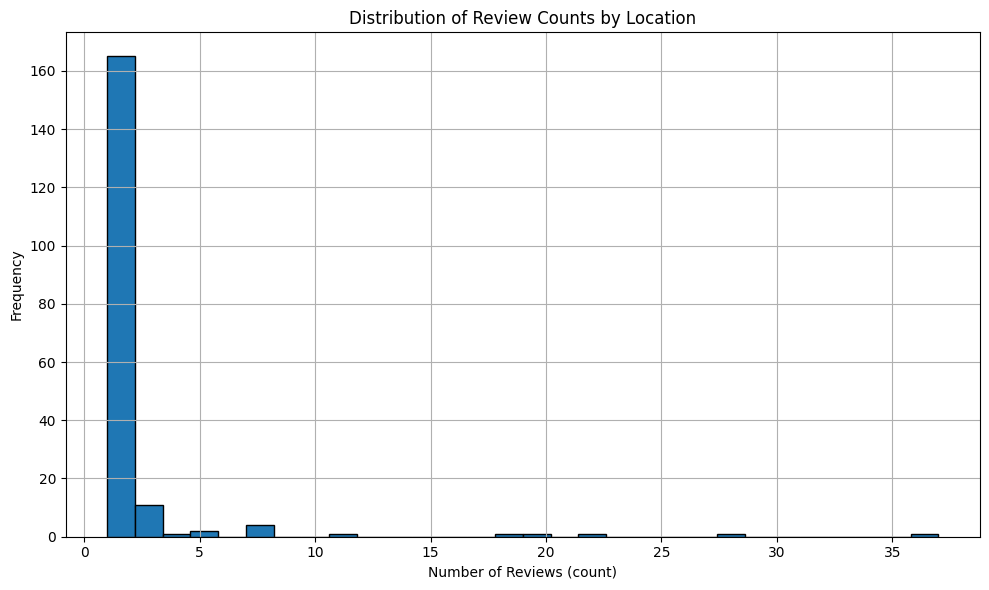

In [ ]:
import matplotlib.pyplot as plt

# count 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(score_df['count'], bins=30, edgecolor='black')
plt.title('Distribution of Review Counts by Location')
plt.xlabel('Number of Reviews (count)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
top20 = score_df.sort_values(by='score', ascending=False).head(20)
display(top20)

,Location_standardized,score,count
66,(city)los angeles,4.857143,7
43,(city)elk grove,4.500000,8
64,(city)london,4.375000,8
109,(city)sunnyvale,3.928571,7
80,(city)new york,3.111111,18
34,(city)cork,3.090909,11
37,(city)cupertino,3.022727,22
3,(city)austin,2.870000,20
128,(country)united states,1.946429,28
129,(no),1.945946,37
